In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#from scipy import stats means to add statisticall distribution

# Discrete uniform distributions

- Theory

A random variable X has a discrete uniform distribution if each of the n values in its range: x1,x2,x3....xn has equal probability:

f(xi)=1/n

- Example & Plotting


Text(0.5, 1.0, 'Probability of dice in each number')

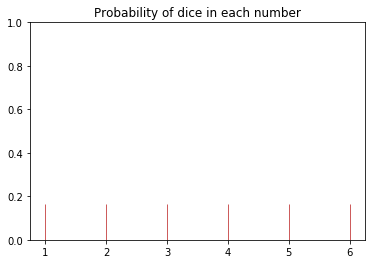

In [14]:
roll_result = range(1,7)
#you could also do roll_result = [1,2,3,4,5,6]

total_probablility_space = 1

Probablility = total_probablility_space/ len(roll_result)

Probablility

#Plotting of functions

prob_rugplot=sns.rugplot(roll_result,height=Probablility,c='indianred')

prob_rugplot.set_title('Probability of dice in each number')


- Output 

f(x) value on the plot is just equal to 1/(Total Possible Outcomes)

In [20]:
# Creating discrete uniform distribution using Scipy

from scipy.stats import randint

# Mean = (6+1)/2 = 3.5
# Variance^2 = [(6-1+1)^2 -1]/12
low, high = 1, 7

mean,var = randint.stats(low,high)

print('The mean is %d, and the variance is %.2f' % (mean,var))

The mean is 3, and the variance is 2.92


<BarContainer object of 6 artists>

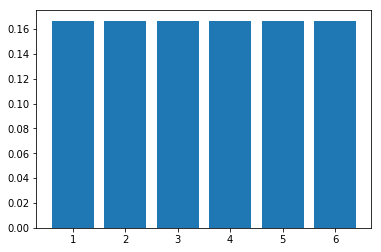

In [22]:
#Bar plot using probabilities
# pmf argument takes # of sample, low boundary and high boundary
plt.bar(roll_result,randint.pmf(roll_result,low,high))

# German Tank Problem

In [51]:
from random import sample

import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pymc3'

In [26]:
import sys

from random import sample

import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# true number of tanks
N = 1000

# number of captured tanks
K = 20

y = sample( range(1,N+1), K )
y = np.array( y )

print( y )

model = pm.Model()

with model:
    N = pm.DiscreteUniform( 'N', lower=np.max(y), upper=10000 )
    lam = pm.HalfNormal( 'lam', sd=10 )
    nobs = pm.Poisson( 'nobs', mu=N*lam, observed=len(y) )
    y_obs = pm.DiscreteUniform( 'y_obs', lower=1, upper=N, observed=y )
    step = pm.Metropolis()
    trace = pm.sample( 1000000, step=step, njobs=4, progressbar=True )

pm.summary( trace )

pm.traceplot( trace )
plt.show()

ModuleNotFoundError: No module named 'pymc3'

# Continous Uniform Distributions

- Definition
A continous random variable X with a probability density function is a continous uniform random variable when:

f(x)=1/(b−a)

a<=x<=b

This makes sense, since for a discrete uniform distribution the f(x)=1/n but in the continous case we don't have a specific n possibilities, we have a range from the min (a) to the max (b)!

The mean is simply the average of the min and max:

(a+b)/2

The variance is defined as:

σ2=(b−a)^2/12

- Example

a taxi ride in NYC takes 22 minutes. After taking some time measurements from experiments we gather that all the taxi rides are uniformly distributed between 19 and 27 minutes. 

* What is the probability density function of a taxi ride, or f(x)?

In [35]:
# Probability density function of a taxi  is 1 /(27-19)
a = 19

b = 27

taxi_den_func= 1/(b-a)

# variance of the continuous uniform distribution is (27 - 19)^2/12

taxi_variance=(b-a)**2/12

print('The probability density function is %.3f, and the variance of this continuous uniform distribution is %1.2f' %(taxi_den_func,taxi_variance) )

The probability density function is 0.125, and the variance of this continuous uniform distribution is 5.33


* what's the probability that the taxi ride will last at least 25 minutes?

In [46]:
# The answer is fx(=> 25) = f(27)-f(25)
# Because 1 = f(27)-f(19)

fx_27 = 27/(b-a)
fx_27

fx_25 = 25/(b-a)
fx_25

Taxi_atleast_25 = fx_27 -fx_25

#fx_19 = 19/(b-a)
print('The probability density function of  taxi ride will last at least 25 minutesis %1.2f %%' %((Taxi_atleast_25)*100 ) )

The probability density function of  taxi ride will last at least 25 minutesis 25.00 %


* Using Scipy to do it automatically

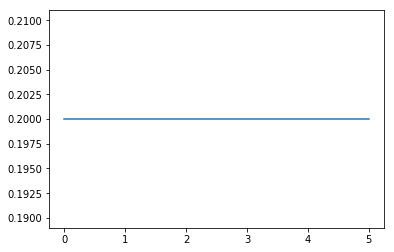

In [53]:
# Import the following
from scipy.stats import uniform
import numpy as np

#Let's set an A and B
A=0
B=5

# Set x as 100 linearly spaced points between A and B
x = np.linspace(A,B,100)

# Use uniform(loc=start point,scale=endpoint)
rv = uniform(loc=A,scale=B)

#Plot the PDF of that uniform distirbution
plt.plot(x,rv.pdf(x))

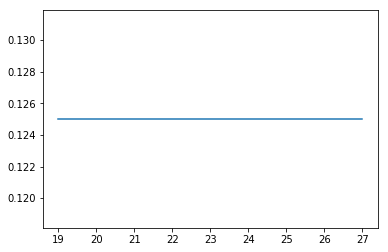

In [55]:
from scipy.stats import uniform
#Same questions
A = 19-19
B = 27-19


#Using numpy linear space
x = np.linspace(A,B,100)

#Use uniform distribution, loc = starting point, scale = end point
rv = uniform(loc=A,scale=B)

#rv.pdf means Probability density functions
# Probability density function of a taxi  is 1 /(27-19) = 0.125
plt.plot(x+19,rv.pdf(x))